Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 



### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.

## 04 - Beginning Pandas

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.

In [1]:
# Import the Pandas library
import pandas as pd

In [2]:
# Get the pandas version being used
pd.__version__

'2.0.0'

In [3]:
# Before reading in data using Pandas, let's play around with Pandas a bit
# First up, let's work with the pd.Series datatype
# Pandas series is a one dimensional array
series_data = pd.Series(data=[2,3,4,5,6,7,2,3], index=[0,1,2,3,4,5,6,7], name='my_series', dtype=int)
series_data

0    2
1    3
2    4
3    5
4    6
5    7
6    2
7    3
Name: my_series, dtype: int32

In [4]:
# Get the data type to confirm this is  Pandas series
type(series_data)

pandas.core.series.Series

In [5]:
# Accessing a value at at offset 6
# Offset 0 has 2, offset 1 has 3.
# Continuing with that pattern, offset 6 has 2
series_data.iloc[6]

2

In [7]:
# Returns an array of the unique values in the series
series_data.unique()

array([2, 3, 4, 5, 6, 7])

In [8]:
# The above could also be confirmed by running a set on the series data
set(series_data)

{2, 3, 4, 5, 6, 7}

In [9]:
# Convert the series data to a dictionary
series_data.to_dict()

{0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 2, 7: 3}

In [10]:
# Find the minimum value in the series
series_data.min()

2

In [11]:
# This could be confirmed by also using python's "min"
min(series_data)

2

In [12]:
# Find the max value in the series
series_data.max()

7

In [13]:
# This could be confirmed by also using python's "max" function
max(series_data)

7

In [14]:
# Get the number of bytes in the series
series_data.nbytes

32

In [15]:
# Above you might be wondering why the value returned is 32
# If we look at the data type of the series data, we see it's int32
# This means, every value is 4 bytes or 32 bits.
series_data.dtype

dtype('int32')

In [16]:
# Above states 32 bytes for nbytes. We can confirm this
# First get the shape of the vector
# We see 8 below
# We also know that the data type as reported above is int32
# int32 means each number is 4 bytes
# each byte is 8 bits.
# Hence 8 * 4 = 32 -> This is the total number of bytes in the series
series_data.shape, '-> Confirming data type: ', series_data.dtype

((8,), '-> Confirming data type: ', dtype('int32'))

In [ ]:
# With our simplistic view of the series data, let's use the pd.DataFrame .
# It is more than likely you will spend your time working with dataframes 
# than you would with series data

In [17]:
# We can setup a dataframe similar to the series by doing the following
# Notice above, we used pd.Series for the series data
# In this instance, we are using pd.Dataframe to setup the dataframe
# Let's also set the datatype as float while we are at it
df = pd.DataFrame(data=[2,3,4,5,6,7,2,3], index=[0,1,2,3,4,5,6,7], columns=['my_df'], dtype=float)
df

,my_df
0,2.0
1,3.0
2,4.0
3,5.0
4,6.0
5,7.0
6,2.0
7,3.0


In [18]:
# You might not have noticed, for the dataframe, 
# I literally copied everything that was in the series information
# changed the "names" parameter to "columns" and that's it.
# So why would I want to use a dataframe?
# Well for starters, I can use much more columns
# Let's look at it from the different perspective
# Mix the columns with int's strings and float
pd.DataFrame(data={'col_int' : [2, 3, 4, 5, 6, 7, 2, 3],\
                    'col_float': [1., 0., 1., 0., 1., 0., 1., 0.],\
                          'col_str': ['securitynik.com', 'sans.org', 'sec595',\
                                       'sec504', 'sec503', 'github.com/securitynik',\
                                          'Mastering TShark Network Forensics', 'Hack and Detect',]},\
                                              index=[0,1,2,3,4,5,6,7])


,col_int,col_float,col_str
0,2,1.0,securitynik.com
1,3,0.0,sans.org
2,4,1.0,sec595
3,5,0.0,sec504
4,6,1.0,sec503
5,7,0.0,github.com/securitynik
6,2,1.0,Mastering TShark Network Forensics
7,3,0.0,Hack and Detect


With a glimpse into what we can do with the dataframe, let's go ahead and work with some real data <br>

Before we do ... <br>
Do note, most of my data will be read via Comma Separated Values (CSV) or Tabbed Separated Values (TSV) files. <br>
You could read from Javascript Object Notation (JSON) files, Excel, HTML, contents in memory, etc.

In [19]:
# Here is an example of reading data from a URL
# Specifically, I am reading the first 5 records from the Iris dataset
pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/SecurityNik/Data-Science-and-ML/main/Beginning-ML-Series/zeek_http.log', delimiter='\t', header=None).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,10.0.0.10,172.16.1.83,1234,91,GET,f01.hd4.co:9999,/237f654d3c994416d63634c6f5baeca54fa09a15/trac...,Securitynik-agent,0,455,200,-,text/plain
1,10.0.0.10,172.16.1.83,1234,92,GET,f01.hd4.co:9999,/237f654d3c994416d63634c6f5baeca54fa09a15/trac...,Securitynik-agent,0,926464,200,-,video/mp2t
2,10.0.0.10,172.16.1.83,1234,93,GET,f01.hd4.co:9999,/237f654d3c994416d63634c6f5baeca54fa09a15/trac...,Securitynik-agent,0,455,200,-,text/plain
3,10.0.0.10,172.16.1.83,1234,94,GET,f01.hd4.co:9999,/237f654d3c994416d63634c6f5baeca54fa09a15/trac...,Securitynik-agent,0,908416,200,-,video/mp2t
4,10.0.0.10,104.26.5.178,80,67,GET,testing1.sn,/securitynik_up/server/load.php?type=watchdog&...,Mozilla/5.0 (QtEmbedded; U; Linux; C) AppleWeb...,0,164,200,-,text/json


In [20]:
# Here is an example of reading data from memory
# First store an entry int memory
my_in_mem_string = "11., 2., 9., 8."
my_in_mem_string

'11., 2., 9., 8.'

In [21]:
# import the StringIO function to read content from memory
from io import StringIO

In [22]:
# Read the variable my_in_mem_string from memory
pd.read_csv(filepath_or_buffer=StringIO(my_in_mem_string))

,11.,2.,9.,8.


Finally, working with real data
Set the columns for the dataset
Note, we could have also read the columns in from the file. 
Most of the times, this is what will be done in the real world. However, if you don't have the columns, what would you do?! 
You have to create your own.

Maybe you wanted to change or even set column names where they did not exist
Hence the reason for using the names option here.
You should notice, the names column looks similar to what was done in the Numpy notebook
    -   01 - Beginning Numpy

Read in tabular data from the Zeek conn.log file

This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html

In [24]:
# Reading the data from the Zeek conn.log
df_conn = pd.read_csv(filepath_or_buffer=r'conn.log', delimiter='\t', skiprows=1, \
                      names=['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', \
                              'service', 'duration', 'orig_bytes', 'resp_bytes', \
                                  'orig_pkts', 'orig_ip_bytes', 'resp_pkts',\
                                      'resp_ip_bytes'], verbose=False, low_memory=True)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,-,-,-,-,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,-,-,-,-,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,-,-,-,-,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,-,-,-,-,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,-,-,-,-,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,-,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,-,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,-,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,-,0.000005,0,0,0,0,1,40


Let's get the info for the dataset using df.info() <br>
The information returned here includes the number of records, the columns, names, data types, etc. <br>
Think about these columns as features which will be used for training the machine and deep learning models later 
All of these features can be used or even a subset

In [25]:
# Getting the info
df_conn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430188 entries, 0 to 4430187
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id.orig_h      object
 1   id.orig_p      int64 
 2   id.resp_h      object
 3   id.resp_p      int64 
 4   service        object
 5   duration       object
 6   orig_bytes     object
 7   resp_bytes     object
 8   orig_pkts      int64 
 9   orig_ip_bytes  int64 
 10  resp_pkts      int64 
 11  resp_ip_bytes  int64 
dtypes: int64(6), object(6)
memory usage: 405.6+ MB


At first glance, we should recognize we have a similar problem to what we had in the Numpy notebook: <br>
&emsp;&emsp;    01 - Beginning Numpy <br>
        
We see there are lots of field values with "-". We should change those to 0 or maybe the mean of the column <br>
Let's find all those fields with null values

In [26]:
# Getting the null value fields
df_conn.isnull().sum()

id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
service          0
duration         0
orig_bytes       0
resp_bytes       0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
dtype: int64

In [27]:
# Interestingly nothing above is reported as having null values. 
# We know there are fields with '-'. What is this about?
# Let's try a different strategy
# Let's find the values that are not a number (nan)
df_conn.isna().sum()

id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
service          0
duration         0
orig_bytes       0
resp_bytes       0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
dtype: int64

In [28]:
# Get the data types of the columns to help confirm why we are not seeing the "-"
# By now, we should recognize the "-" is not recognized as null or or NA or NAN, etc.
# Why is this so? Look at the data types again
df_conn.dtypes

id.orig_h        object
id.orig_p         int64
id.resp_h        object
id.resp_p         int64
service          object
duration         object
orig_bytes       object
resp_bytes       object
orig_pkts         int64
orig_ip_bytes     int64
resp_pkts         int64
resp_ip_bytes     int64
dtype: object

Looking at the data types shown above,we should recognize some potential issues. <br>
For example, the duration, orig_bytes, resp_bytes fields are all objects types. <br>
We know these fields should contain numerical values such as int or float but surely not strings <br>
Taking a sneak peak at what we want to do 


In [29]:
# Converting the values to numeric
# While this has converted the "-", we see they are now "NaN"
pd.to_numeric(df_conn['duration'], errors='coerce')[:10]


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    0.053276
6    0.383646
7    0.054294
8    0.424980
9    0.272567
Name: duration, dtype: float64

In [30]:
# Looking above (and below) at the bottom of the output, the type is now float64 rather than object
# replacing the "NaN" with 0 and downcasting everything to float at the same time, 
# by using the parameter "downcast" Show only the first 10 records
pd.to_numeric(df_conn['duration'], errors='coerce').fillna(value=0, axis=0, downcast='float')[:10]

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.053276
6    0.383646
7    0.054294
8    0.424980
9    0.272567
Name: duration, dtype: float64

In [31]:
# With the understanding now of how we convert the "-" to "0.0" 
# Let's now update the duration column within the dataframe 
# Basically I copied and pasted the contents from above
df_conn['duration'] = pd.to_numeric(df_conn['duration'], \
                                    errors='coerce').fillna(value=0., axis=0).astype('float32')
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,-,0.000000,-,-,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,-,0.000000,-,-,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,-,0.000000,-,-,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,-,0.000000,-,-,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,-,0.000000,-,-,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,-,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,-,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,-,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,-,0.000005,0,0,0,0,1,40


In [32]:
# Let's revisit that duration field to confirm it is no longer of type object but of type float
# Rather than looking at all columns like we did previously
# Let's look at the duration column only, using two different styles
# Both methods return float32
df_conn.duration.dtypes, df_conn['duration'].dtypes

(dtype('float32'), dtype('float32'))

In [33]:
# We should notice above though
# While we were able to fill in the duration field with 0s where there were '-'
# we see there is still a problem with the service, orig_bytes, resp_bytes, 
# orig_pkts, orig_ip_bytes, resp_pkts, resp_ip_bytes
# Let's use the same strategy that we used on the duration field 
df_conn['orig_bytes'] = pd.to_numeric(df_conn['orig_bytes'], errors='coerce', \
                                      downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

df_conn['resp_bytes'] = pd.to_numeric(df_conn['resp_bytes'], errors='coerce', \
                                      downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

df_conn['orig_pkts'] = pd.to_numeric(df_conn['orig_pkts'], errors='coerce', \
                                     downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

df_conn['orig_ip_bytes'] = pd.to_numeric(df_conn['orig_ip_bytes'], errors='coerce', \
                                         downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

df_conn['resp_pkts'] = pd.to_numeric(df_conn['resp_pkts'], errors='coerce', \
                                     downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

df_conn['resp_ip_bytes'] = pd.to_numeric(df_conn['resp_ip_bytes'], errors='coerce', \
                                         downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

# Let's also use the opportunity to make the originator and responder port fields as int32
df_conn['id.orig_p'] = pd.to_numeric(df_conn['id.orig_p'], errors='coerce', \
                                     downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

df_conn['id.resp_p'] = pd.to_numeric(df_conn['id.resp_p'], errors='coerce', \
                                     downcast='unsigned').fillna(value=0, axis=0).astype('int32') 

# Look at the first 10 records
df_conn.head(10)


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,-,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,-,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,-,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,-,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,-,0.000000,0,0,0,0,0,0
5,192.168.0.10,52824,89.187.183.77,8888,http,0.053276,208,976,6,528,6,1296
6,192.168.0.10,52826,89.187.183.77,8888,http,0.383646,227,692369,202,10739,117,240893
7,192.168.0.10,52828,89.187.183.77,8888,http,0.054294,208,977,6,528,6,1297
8,192.168.0.10,52830,89.187.183.77,8888,http,0.424980,227,791633,176,9387,174,367737
9,192.168.0.10,52832,89.187.183.77,8888,http,0.272567,227,406607,171,9127,71,169939


In [34]:
# Revisit the data types
df_conn.dtypes

id.orig_h         object
id.orig_p          int32
id.resp_h         object
id.resp_p          int32
service           object
duration         float32
orig_bytes         int32
resp_bytes         int32
orig_pkts          int32
orig_ip_bytes      int32
resp_pkts          int32
resp_ip_bytes      int32
dtype: object

For some strange reason below, I have negative values showing up in resp_bytes. <br>
We know that the network cannot produce negative bytes, hence, I'm going to drop these rows. <br>
Dropping these 5 rows from a dataset of 4 million+ records will have little to no impact <br>
It would be nice if I had figured out why these negative values are showing up. <br>
However, not something I went to spend more time on. <br>
If you are reading this and know why I got the negative values for "resp_bytes" <br> 
column, please leave me a comment

In [35]:
# Identify the column where resp_bytes are less than 0 basically having negative rows
df_conn[df_conn['resp_bytes'] < 0]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
2679112,192.168.0.33,53066,204.79.197.203,443,-,2.815033,196,-2147483648,5,432,4,192
2734488,192.168.0.33,53865,204.79.197.203,443,-,2.828233,517,-2147483648,5,753,4,192
2803027,192.168.0.33,50236,131.253.33.203,443,-,3.487992,587,-2147483648,6,1450,6,272
2803790,192.168.0.33,50240,131.253.33.203,443,-,2.834785,517,-2147483648,5,753,4,192
2881234,192.168.0.33,51054,13.107.21.200,443,-,2.817441,588,-2147483648,5,824,4,192


In [36]:
# Confirming the shape before dropping
# We see there are 4430188 samples and 12 columns
df_conn.shape

(4430188, 12)

In [37]:
# Everything looks better ... almost everything is filled in
# You might have noticed above, I did not modify the 'service' column
# I will drop the service column eventually. and focus on the numeric columns
df_conn =  df_conn[~df_conn['resp_bytes'] < 0]

# Confirm that the negatives records to longer exists with resp_bytes
df_conn[df_conn['resp_bytes'] < 0]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes


In [38]:
# Get the shape once again
# This confirms that the 5 records have been dropped
df_conn.shape

(4430183, 12)

In [39]:
# Let's go ahead now and drop that Service column
# Below output of the shape confirms that one column has been dropped
# We have moved from 12 above to 11 below
df_conn = df_conn.drop(columns=['service'], axis=1, inplace=False)
df_conn.shape

(4430183, 11)

In [40]:
# Save the tidied up dataframe offline
# This way, we can reuse it later if we wish
# Maybe we want to share it with another security team?!
df_conn.to_csv('./df_conn_cleaned.csv')
!dir /b df_conn_cleaned.csv

df_conn_cleaned.csv


In [41]:
# Let's extract the columns with id.orig_h, id.resp_h
# These fields represent the source and destination IPs, respectively
# We can attempt to cluster these values later
df_ips = df_conn[['id.orig_h', 'id.resp_h']]
df_ips	

,id.orig_h,id.resp_h
0,127.0.0.1,127.0.0.1
1,192.168.0.4,192.168.0.4
2,192.168.0.4,192.168.0.4
3,127.0.0.1,127.0.0.1
4,192.168.0.4,192.168.0.4
...,...,...
4430183,192.168.0.21,192.168.0.4
4430184,192.168.0.4,192.168.0.4
4430185,192.168.0.4,192.168.0.4
4430186,192.168.0.4,192.168.0.4


In [42]:
# Maybe you want to group the IPs to see the frequencies of their communication
# We see that there is a 188822 records of communication between 127.0.0.1 and 127.0.0.1
# Realistically, I would drop these rows
# If we are looking at security issues, these communications for localhost poses less of a risk 
# when compared to none loopback IPs.
df_ips.groupby(['id.orig_h', 'id.resp_h']).size()

id.orig_h                  id.resp_h      
0.0.0.0                    255.255.255.255        48
127.0.0.1                  127.0.0.1          188822
                           127.0.0.53           2940
                           127.0.1.1              33
127.0.1.1                  127.0.0.1              13
                                               ...  
fe80::d455:3b15:7c0c:f19f  ff02::1:2               9
                           ff02::1:3              65
                           ff02::2                11
                           ff02::c                49
                           ff02::fb               22
Length: 4842, dtype: int64

In [43]:
# Finding all records where the communication is between 127.0.0.1 and 127.0.0.1
# this returns 188822, which is what we saw above
df_conn[(df_conn['id.orig_h'] == '127.0.0.1') & (df_conn['id.resp_h'] == '127.0.0.1') ]  

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
19,127.0.0.1,58568,127.0.0.1,27762,0.000000,0,0,0,0,0,0
38,127.0.0.1,58568,127.0.0.1,27762,0.000000,0,0,0,0,0,0
57,127.0.0.1,58568,127.0.0.1,27762,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4429383,127.0.0.1,42048,127.0.0.1,8200,0.000023,0,0,0,0,1,40
4429590,127.0.0.1,52322,127.0.0.1,6789,0.000000,0,0,0,0,0,0
4429872,127.0.0.1,51776,127.0.0.1,27762,0.000000,0,0,0,0,0,0
4429882,127.0.0.1,6789,127.0.0.1,52322,0.010450,0,0,0,0,1,40


In [44]:
# Get the index of these records
df_conn[(df_conn['id.orig_h'] == '127.0.0.1') & (df_conn['id.resp_h'] == '127.0.0.1') ].index

Index([      0,       3,      19,      38,      57,      76,      90,     103,
           118,     136,
       ...
       4428645, 4428828, 4429042, 4429113, 4429380, 4429383, 4429590, 4429872,
       4429882, 4430176],
      dtype='int64', length=188822)

In [45]:
# Drop those records where the communication seems to be between the localhost
# Remember, I consider these a lower risk
df_conn = df_conn.drop(df_conn[(df_conn['id.orig_h'] == '127.0.0.1') &\
                                (df_conn['id.resp_h'] == '127.0.0.1') ].index, inplace=False)
df_conn


,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
5,192.168.0.10,52824,89.187.183.77,8888,0.053276,208,976,6,528,6,1296
6,192.168.0.10,52826,89.187.183.77,8888,0.383646,227,692369,202,10739,117,240893
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


In [46]:
# For those paying close attention, looking above we have 4241361 records
# The original dataframe had 4430188 records
# The expectation was that we would drop 188822
# However, I'm not worried about the additional 5 records, in the context of the size of this dataset
( 4430188 - 4241361 )

188827

In [47]:
# Revisit the grouping
df_ips = df_conn[['id.orig_h', 'id.resp_h']]
df_ips.groupby(['id.orig_h', 'id.resp_h']).size()

id.orig_h                  id.resp_h      
0.0.0.0                    255.255.255.255      48
127.0.0.1                  127.0.0.53         2940
                           127.0.1.1            33
127.0.1.1                  127.0.0.1            13
142.250.31.188             192.168.0.24          2
                                              ... 
fe80::d455:3b15:7c0c:f19f  ff02::1:2             9
                           ff02::1:3            65
                           ff02::2              11
                           ff02::c              49
                           ff02::fb             22
Length: 4841, dtype: int64

In [48]:
# Let's clean up these 127 addresses a bit more
# Removing records where the start IP address is something of little \
# importance to this problem we are trying to eventually solve.
df_conn = df_conn.drop(df_conn[(df_conn['id.orig_h'] == '0.0.0.0') | \
                               (df_conn['id.orig_h'] == '127.0.0.1') | \
                                (df_conn['id.orig_h'] == '127.0.1.1') | \
                                    (df_conn['id.resp_h'] == 'ff02::1:2') | \
                                        (df_conn['id.resp_h'] == 'ff02::1:3') | \
                                            (df_conn['id.resp_h'] == 'ff02::2') | \
                                                (df_conn['id.resp_h'] == 'ff02::c') | \
                                                    (df_conn['id.resp_h'] == 'ff02::fb') ].index, inplace=False)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
5,192.168.0.10,52824,89.187.183.77,8888,0.053276,208,976,6,528,6,1296
6,192.168.0.10,52826,89.187.183.77,8888,0.383646,227,692369,202,10739,117,240893
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


In [49]:
# Revisit the grouping again
df_ips = df_conn[['id.orig_h', 'id.resp_h']]
df_ips.groupby(['id.orig_h', 'id.resp_h']).size()

id.orig_h                  id.resp_h        
142.250.31.188             192.168.0.24          2
                           192.168.0.71          8
142.251.111.188            192.168.0.23          2
                           192.168.0.24         28
142.251.16.188             192.168.0.71          3
                                                ..
fe80::b0e6:a8c0:5724:2b6c  ff02::1               1
fe80::ce25:4f71:339:bac9   ff02::1               2
                           ff02::16             69
                           ff02::1:ffde:c7b7     2
fe80::d455:3b15:7c0c:f19f  ff02::1              11
Length: 4791, dtype: int64

In [50]:
# Let us also save this IP dataframe to a file. 
# Maybe you would like to use the IPs for additional analysis
# Or maybe you want to share these with your threat intelligence team. Who knows!
df_ips.to_csv(path_or_buf=r'./df_ips.txt')

In [51]:
# Verify the file exists
!dir /b ".\df_ips.txt"

df_ips.txt


In [52]:
# Making a copy of the df_conn dataframe
df_working_copy = df_conn.copy(deep=True)

# Show the first 5 records of the copied dataframe
df_working_copy.head(5)

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
5,192.168.0.10,52824,89.187.183.77,8888,0.053276,208,976,6,528,6,1296
6,192.168.0.10,52826,89.187.183.77,8888,0.383646,227,692369,202,10739,117,240893


In [53]:
# Let's now drop the id.orig_h, id.resp_h columns
# Verify the shape
# Notice I also dropped the id_orig_p column. 
# The source port is a random value and may not add any value for what we need this data for later
# For now, I don't see a benefit to it.
# Let me know if you think I am wrong
df_working_copy = df_working_copy.drop(['id.orig_h', 'id.orig_p','id.resp_h'], axis=1)
df_working_copy.head(5)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
1,48798,0.000000,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296
6,8888,0.383646,227,692369,202,10739,117,240893


In [54]:
# Let's save this also
df_working_copy.to_csv(path_or_buf=r'./df_working_copy.csv', )

# Verify the file has been created
!dir /b df_working_copy.csv 

df_working_copy.csv


In [55]:
# Continuing our data analysis
# Let's look at the descriptive / summary statistics
df_working_copy.describe(include='all')

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,4.236125e+06,4.236125e+06,4.236125e+06,4.236125e+06,4.236125e+06,4.236125e+06,4.236125e+06,4.236125e+06
mean,9.049044e+03,8.575374e-01,9.970887e+02,1.465002e+04,1.880091e+00,3.384534e+02,2.527928e+00,3.750059e+03
std,3.004800e+03,4.283004e+01,1.012089e+06,3.335643e+06,2.994744e+02,2.355291e+05,4.462585e+02,5.185124e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.200000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.200000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.200000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.428600e+04,3.330640e+04,1.882413e+09,2.098064e+09,4.760320e+05,4.239754e+08,5.713830e+05,5.788748e+08


In [56]:
# Maybe a better view of these statistics
df_working_copy.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
id.resp_p,4236125.0,9049.043592,3.004800e+03,0.0,9200.0,9200.0,9200.0,6.428600e+04
duration,4236125.0,0.857537,4.283004e+01,0.0,0.0,0.0,0.0,3.330640e+04
orig_bytes,4236125.0,997.088661,1.012089e+06,0.0,0.0,0.0,0.0,1.882413e+09
resp_bytes,4236125.0,14650.020037,3.335643e+06,0.0,0.0,0.0,0.0,2.098064e+09
orig_pkts,4236125.0,1.880091,2.994744e+02,0.0,0.0,0.0,0.0,4.760320e+05
orig_ip_bytes,4236125.0,338.453410,2.355291e+05,0.0,0.0,0.0,0.0,4.239754e+08
resp_pkts,4236125.0,2.527928,4.462585e+02,0.0,0.0,0.0,0.0,5.713830e+05
resp_ip_bytes,4236125.0,3750.058769,5.185124e+05,0.0,0.0,0.0,0.0,5.788748e+08


In [ ]:
# In the notebook for Numpy, we used np.set_printoptions to suppress scientific notation
#    01 - Beginning Numpy <br>
# This notebook is about pandas, so let us use pandas to get the values above in a more human readable format.
# Specifically, let us use the pd.option.display.float_format


In [57]:
# Disabling scientific notation in pandas. 
# Produce the results up to 2 decimal places
# Looking at the transposed data
pd.options.display.float_format = '{:.2f}'.format
df_working_copy.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id.resp_p,4236125.00,9049.04,3004.80,0.00,9200.00,9200.00,9200.00,64286.00
duration,4236125.00,0.86,42.83,0.00,0.00,0.00,0.00,33306.40
orig_bytes,4236125.00,997.09,1012088.92,0.00,0.00,0.00,0.00,1882412858.00
resp_bytes,4236125.00,14650.02,3335642.86,0.00,0.00,0.00,0.00,2098063527.00
orig_pkts,4236125.00,1.88,299.47,0.00,0.00,0.00,0.00,476032.00
orig_ip_bytes,4236125.00,338.45,235529.07,0.00,0.00,0.00,0.00,423975367.00
resp_pkts,4236125.00,2.53,446.26,0.00,0.00,0.00,0.00,571383.00
resp_ip_bytes,4236125.00,3750.06,518512.43,0.00,0.00,0.00,0.00,578874775.00


In [58]:
# Find all columns where the originator bytes is greater than the mean of the column
# We see below 23,594 records have been returned
df_working_copy[df_working_copy['orig_bytes'] > df_working_copy.orig_bytes.mean() ]

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
199,27761,24.01,382869,0,6,86201,0,0
219,80,0.39,1193,477329,164,9729,322,472361
222,2055,0.00,10972,0,8,11196,0,0
223,2055,0.00,10128,0,8,10352,0,0
230,443,23.92,10067,2607,25,7110,31,3859
...,...,...,...,...,...,...,...,...
4430155,9200,5336.50,43456,121480,543,65472,123,4920
4430156,9200,5576.32,43457,123504,557,66046,125,5000
4430157,9200,5604.45,45133,127552,569,68217,130,5200
4430160,22,924.12,33264,26988,1266,83916,62,2480


As we will ultimately be concerned about looking for anomalies, maybe, it makes more sense to look at the standard deviation.

In [59]:
# We can see from this view, we have only 85 records returned. 
# Maybe these are the ones we should pay more attention to
df_working_copy[df_working_copy['orig_bytes'] > df_working_copy.orig_bytes.std() ]

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5982,443,5.93,15759454,645,7798,11593818,10588,428317
51574,27761,107.69,1567276,0,14,133416,0,0
55611,27761,217.39,3213967,0,6,58430,0,0
115226,9200,130.99,2480118,362609,50,1595225,10,197593
115972,9200,141.09,3561386,1107090,60,3026679,33,982584
...,...,...,...,...,...,...,...,...
4032886,9200,264.84,1207114,451720,1,52,11,373114
4052768,51094,7110.42,1124942,16527,1873,1251154,1695,112731
4070183,33440,1079.27,1767062,0,52,1586878,0,0
4192109,9200,213.56,1107362,186663,1,52,5,159831


Or maybe, we should use the packets where the originator bytes is greater <br> 
than the resp_bytes standard deviation. <br>
This may help us to identify possible exfiltration occurring on our network.

In [60]:
# We see below the results returned from this query
df_working_copy[df_working_copy['orig_bytes'] > df_working_copy.resp_bytes.std() ]

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5982,443,5.93,15759454,645,7798,11593818,10588,428317
115972,9200,141.09,3561386,1107090,60,3026679,33,982584
136254,9200,14.95,4160947,204140,102,4015631,6,176610
1040516,41588,2978.41,4553312,0,139,4159853,0,0
2090810,443,174.11,8115412,717,1595,2500877,2839,173865
2090821,443,104.25,4099322,717,1408,2389976,1978,140614
2123485,443,222.76,7452491,717,727,1219284,2521,140769
2139829,443,208.97,14202356,717,1562,2279129,5554,306191
2810904,3478,205.59,4810676,18036152,16740,5279396,29834,18871504
2879141,443,3604.15,4081113,218679,9700,4623513,11614,714383


In [62]:
# We see no length or shape information returned above, 
# When  ".shape" is appended to the above command, we see 29 records and 8 features returned
df_working_copy[df_working_copy['orig_bytes'] > df_working_copy.resp_bytes.std() ].shape

(29, 8)

Let's look at the records where the orig_bytes is greater resp_bytes. <br>
This may be another possible sign of exfiltration <br>
Notice, both above and below, I am using two different methods to access the features. <br>
We will ultimately need to make a decision on what is considered anomalous

In [63]:
# Getting the packets with originator bytes greater than responder bytes
# This query returned 27,509  records
df_working_copy[df_working_copy['orig_bytes'] > df_working_copy.resp_bytes ]

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
115,53,7.05,155,0,5,295,0,0
143,53,7.06,155,0,5,295,0,0
167,5353,0.00,155,0,3,239,0,0
199,27761,24.01,382869,0,6,86201,0,0
222,2055,0.00,10972,0,8,11196,0,0
...,...,...,...,...,...,...,...,...
4428838,3702,6.50,4592,0,7,4788,0,0
4429203,443,0.12,2352,1073,11,2932,10,1601
4429476,51094,5.95,2200,39,3,2356,3,195
4429668,2055,0.00,8808,0,7,9004,0,0


One more query. <br>
This time, find all records where the originator bytes is greater than the responder bytes <br> 
AND the originator bytes is greater than the standard deviation of the column. <br>
Let's use this for our anomalies. <br>
Specifically, this will be used to add a label column of 1 for suspicious and everything else will be 0. <br>
Adding the labels, will allow us to make this dataset into one that can be used for supervised learning, <br>
something we will touch on later <br>
&emsp; 10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
&emsp; 15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
&emsp; 16 - Beginning Deep Learning, - Classification, Tensorflow <br>
&emsp; 17 - Beginning Deep Learning, - Classification, Pytorch <br>
&emsp; 18 - Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow <br> 


In [64]:
# Filtering out the records likely to be suspicious.
# Suspicious is relative here! This is just my "domain" of expertise (Cyber Security) and 
# "environment knowledge" (the network being monitored) being used
# We see 67 records below
df_working_copy[( df_working_copy['orig_bytes'] > df_working_copy.resp_bytes ) \
                 & ( df_working_copy['orig_bytes'] > df_working_copy.orig_bytes.std())]

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5982,443,5.93,15759454,645,7798,11593818,10588,428317
51574,27761,107.69,1567276,0,14,133416,0,0
55611,27761,217.39,3213967,0,6,58430,0,0
115226,9200,130.99,2480118,362609,50,1595225,10,197593
115972,9200,141.09,3561386,1107090,60,3026679,33,982584
...,...,...,...,...,...,...,...,...
4032886,9200,264.84,1207114,451720,1,52,11,373114
4052768,51094,7110.42,1124942,16527,1873,1251154,1695,112731
4070183,33440,1079.27,1767062,0,52,1586878,0,0
4192109,9200,213.56,1107362,186663,1,52,5,159831


The summary statistics of the duration field also looks interesting <br>
How long are you expecting a connection to be opened for?! <br>
Depending on the application protocol in use, that can impact the duration of the session. <br>
Looking at it from the output above, we see "id.resp_p". <br>
This feature tells us the server side port, i.e. HTTPS, HTTP, SSH, etc. <br>
For sessions with port 443, this is typically associated with HTTPS and may be a connection that is not long, <br>
as we typically request a web page and then assume the connection is closed. <br>
Do keep in mind, HTTP versions prior to 2 (and obviously 3) has a keep-alive option <br> 
that allows an idle session to remain open before it is closed. <br>
https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/Keep-Alive <br><br>

With that said, is the duration for the first 443 session 5.93 acceptable? <br>
Is the last one with duration 362.55 seconds acceptable? <br>
You will need to figure these out, based on your environment and domain knowledge. <br> <br>

I will use my domain and environment knowledge, to come up with a threshold.

In [66]:
# Looking at those sessions that have a duration greater than the mean of the duration column
# We see 35,476 records
df_working_copy[ df_working_copy.duration > df_working_copy.duration.mean() ]

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
33,52311,3.01,0,0,3,156,0,0
108,443,14.64,1,73,4,161,5,285
109,8888,0.90,227,602118,228,12211,101,167186
115,53,7.05,155,0,5,295,0,0
141,443,14.89,1,73,4,161,4,245
...,...,...,...,...,...,...,...,...
4430156,9200,5576.32,43457,123504,557,66046,125,5000
4430157,9200,5604.45,45133,127552,569,68217,130,5200
4430160,22,924.12,33264,26988,1266,83916,62,2480
4430161,9200,5643.15,238524,1036328,2260,329620,6,240


In [ ]:
# Looking at the duration again, this time from the perspectives of the Standard Deviation
# Here we see we got 12,930 rows returned
df_working_copy[ df_working_copy.duration > df_working_copy.duration.std() ]

Let's go ahead and add some labels to this dataset <br>
We will consider the records returned from this query <br>
&emsp;    df_working_copy[( df_working_copy['orig_bytes'] > df_working_copy.resp_bytes ) & ( df_working_copy['orig_bytes'] > df_working_copy.orig_bytes.std())] <br>
as traffic of concern, ie. suspicious <br>

Create a new empty column named 'label' <br>
Fill this column with 1. <br>
1 represents a match, of our filters. <br>
Everything else that does not match our filters will be 0 <br>

Hence 1=suspicious, 0=normal

In [67]:
# Create the new column and assign each sample the value of 1 for starters
df_working_copy['label'] = 1
df_working_copy.head(10)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.00,0,0,0,0,0,0,1
2,48804,0.00,0,0,0,0,0,0,1
4,27761,0.00,0,0,0,0,0,0,1
5,8888,0.05,208,976,6,528,6,1296,1
6,8888,0.38,227,692369,202,10739,117,240893,1
7,8888,0.05,208,977,6,528,6,1297,1
8,8888,0.42,227,791633,176,9387,174,367737,1
9,8888,0.27,227,406607,171,9127,71,169939,1
10,8888,0.00,0,0,1,40,1,52,1
11,443,0.00,0,0,0,0,1,52,1


In [68]:
# For simplicity along with making this notebook easier to read,
# I am declaring variables to hold each of the filters
# Setup the first of two filters to separately to feed to pandas where clause
orig_gtr_resp = (df_working_copy['orig_bytes'] > df_working_copy.resp_bytes )
orig_gtr_resp.head(10)

1     False
2     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [69]:
# Setup the second of the two filter to feed to pandas where clause
orig_gtr_std = (df_working_copy['orig_bytes'] > df_working_copy.orig_bytes.std())
orig_gtr_std 

1          False
2          False
4          False
5          False
6          False
           ...  
4430183    False
4430184    False
4430185    False
4430186    False
4430187    False
Name: orig_bytes, Length: 4236125, dtype: bool

With the new label column created, time to change the values <br>
We are running the where clause on the label column, using our two filters. <br>
Where the filters match, we will keep the 1 in the column. <br>
For everything else, we will change it to 0. 0 being this row does not match our filter


In [70]:
# Running the query to update the labels
df_working_copy['label'] = (df_working_copy['label']).where( orig_gtr_resp & orig_gtr_std, other=0 )

# Show the first 10 records
df_working_copy.head(10)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.00,0,0,0,0,0,0,0
2,48804,0.00,0,0,0,0,0,0,0
4,27761,0.00,0,0,0,0,0,0,0
5,8888,0.05,208,976,6,528,6,1296,0
6,8888,0.38,227,692369,202,10739,117,240893,0
7,8888,0.05,208,977,6,528,6,1297,0
8,8888,0.42,227,791633,176,9387,174,367737,0
9,8888,0.27,227,406607,171,9127,71,169939,0
10,8888,0.00,0,0,1,40,1,52,0
11,443,0.00,0,0,0,0,1,52,0


In [ ]:
# While above, we showed the first 10 records
# Time to confirm the unique values
# This returns only 0 and 1. Just what we wanted to see
df_working_copy['label'].unique()

Get a count of those unique values. <br>
We see the statistics below for the two groups. <br>
Below should also identify, when this comes to building the machine learning models <br>
This will be a highly imbalanced problem <br>
Then again, it is something we have to deal with in real networks <br>
The majority of your traffic will be legitimate. <br>
Hence this problem is not something we will be easily able to run from

In [71]:
# Getting the count of the unique values
df_working_copy.label.value_counts()

label
0    4236058
1         67
Name: count, dtype: int64

Let's create a new dataframe with these labels <br>
Hopefully, you have seen above, just one way, how we can move from unlabeled to labeled data.  <br>
In other words, how we may be able to move from unsupervised to supervised learning  <br>

In the notebooks on anomaly detection and unsupervised (clustering) learning, we use those methods to get the dataset into one we can use for supervised learning

&emsp;&emsp;08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
&emsp;&emsp;09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>

In [72]:
# Making a copy of the dataset with labels
df_conn_with_labels = df_working_copy.copy(deep=True)
df_conn_with_labels.head(10)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.00,0,0,0,0,0,0,0
2,48804,0.00,0,0,0,0,0,0,0
4,27761,0.00,0,0,0,0,0,0,0
5,8888,0.05,208,976,6,528,6,1296,0
6,8888,0.38,227,692369,202,10739,117,240893,0
7,8888,0.05,208,977,6,528,6,1297,0
8,8888,0.42,227,791633,176,9387,174,367737,0
9,8888,0.27,227,406607,171,9127,71,169939,0
10,8888,0.00,0,0,1,40,1,52,0
11,443,0.00,0,0,0,0,1,52,0


In [73]:
# Save the file with labels
df_conn_with_labels.to_csv(path_or_buf=r'./df_conn_with_labels.csv')


In [ ]:
# Before getting the correlation matrix
# Let's drop the label column from the df_working_copy
df_working_copy.drop(columns=['label'], inplace=True)
df_working_copy.head(10)

Get the correlation matrix from the features <br>
This helps us to understand how variables are correlated <br>
To learn more about correlation matrix, see  <br>
https://www.wallstreetmojo.com/correlation-matrix/  <br>
https://www.displayr.com/what-is-a-correlation-matrix/  <br>

Correlation goes betwen -1 and +1  <br>
The correlation matrix can be considered as a normalized version of the covariance matrix

In [74]:
# Getting the correlation matrix
df_working_copy.corr(method='pearson')

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
id.resp_p,1.00,-0.04,-0.00,-0.01,-0.01,-0.00,-0.01,-0.01,0.01
duration,-0.04,1.00,0.01,0.01,0.08,0.06,0.06,0.03,0.16
orig_bytes,-0.00,0.01,1.00,0.14,0.20,0.22,0.14,0.08,0.15
resp_bytes,-0.01,0.01,0.14,1.00,0.11,0.06,0.15,0.17,0.00
orig_pkts,-0.01,0.08,0.20,0.11,1.00,0.91,0.84,0.66,0.16
orig_ip_bytes,-0.00,0.06,0.22,0.06,0.91,1.00,0.64,0.39,0.16
resp_pkts,-0.01,0.06,0.14,0.15,0.84,0.64,1.00,0.95,0.10
resp_ip_bytes,-0.01,0.03,0.08,0.17,0.66,0.39,0.95,1.00,0.03
label,0.01,0.16,0.15,0.00,0.16,0.16,0.10,0.03,1.00


In [75]:
# Maybe you would like a prettier view
df_working_copy.corr(method='pearson').style.background_gradient(cmap='brg')

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
id.resp_p,1.000000,-0.043802,-0.002469,-0.007909,-0.007343,-0.002155,-0.007490,-0.007042,0.011548
duration,-0.043802,1.000000,0.013363,0.005252,0.080943,0.057768,0.061029,0.030074,0.158957
orig_bytes,-0.002469,0.013363,1.000000,0.139161,0.201162,0.223028,0.138787,0.081752,0.152670
resp_bytes,-0.007909,0.005252,0.139161,1.000000,0.108038,0.058442,0.153468,0.165181,0.004482
orig_pkts,-0.007343,0.080943,0.201162,0.108038,1.000000,0.913031,0.840132,0.662967,0.162357
orig_ip_bytes,-0.002155,0.057768,0.223028,0.058442,0.913031,1.000000,0.636315,0.385603,0.163331
resp_pkts,-0.007490,0.061029,0.138787,0.153468,0.840132,0.636315,1.000000,0.946548,0.097642
resp_ip_bytes,-0.007042,0.030074,0.081752,0.165181,0.662967,0.385603,0.946548,1.000000,0.030791
label,0.011548,0.158957,0.152670,0.004482,0.162357,0.163331,0.097642,0.030791,1.000000


What does these correlation matrix above tell us?  <br>
It tels us the strength and direction of the relationship. <br>
A value of +1 means strong positive linear relationship.  <br>
A value of -1 means strong negative linear relationship.  <br>
A Value of 0 means no linear relationship.  <br>

Taking an example from above  <br>
We can see a strong positive relationship "0.946548" between resp_ip_bytes and resp_pkts   <br>
Similarly, looking at orig_pkts and orig_ip_bytes, we see  "0.913031"  <br>
This suggest a strong positive linear relationship  <br>

Looking at negative relationships, we see many weak negative relationships  <br>
For example, we see "-0.001296" for orig_bytes and id.resp_p  <br>
Similarly, we see weak negative relationships between orig_ip_bytes and id.resp_p  <br>

Overall, looking a this, it seems some of these features may not be helpful when we are ready to make predictions. <br>
Meaning, maybe instead of all of these, we can reduce the dimensions. <br>
Not to worry, we will do this via dimensionality reduction  <br>
See notebook: <br>
&emsp; &emsp; 07 - Beginning Principal Component Analysis (PCA) <br>


Get the covariance matrix for the data  <br>
We will need this covariance later, when we work on Principal Component Analysis (PCA)
as in notebook .... <br>
&emsp; &emsp; 07 - Beginning Principal Component Analysis (PCA) <br>

The covariance and correlation matrix are similar.  <br>
This covariance matrix tells us the direction of the relationship <br>
While correlation goes between -1 and +1. using for example Pearson coefficient  <br>
covariance goes from -infinity to +infinity

In [76]:
# Getting the covariance matrix  
df_working_copy.cov()

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
id.resp_p,9028825.23,-5637.11,-7509280.96,-79273343.17,-6607.50,-1524965.50,-10043.48,-10972307.40,0.14
duration,-5637.11,1834.41,579268.90,750275.12,1038.22,582746.25,1166.46,667891.52,0.03
orig_bytes,-7509280.96,579268.90,1024323989578.86,469802998512.03,60971219.08,53164683587.92,62683601.80,42901644232.73,614.50
resp_bytes,-79273343.17,750275.12,469802998512.03,11126513258977.96,107923557.95,45914212900.67,228446372.69,285691759388.22,59.45
orig_pkts,-6607.50,1038.22,60971219.08,107923557.95,89684.92,64400594.95,112277.70,102946375.83,0.19
orig_ip_bytes,-1524965.50,582746.25,53164683587.92,45914212900.67,64400594.95,55473940975.39,66881115.80,47091705691.68,152.99
resp_pkts,-10043.48,1166.46,62683601.80,228446372.69,112277.70,66881115.80,199146.65,219022296.08,0.17
resp_ip_bytes,-10972307.40,667891.52,42901644232.73,285691759388.22,102946375.83,47091705691.68,219022296.08,268855138674.95,63.49
label,0.14,0.03,614.50,59.45,0.19,152.99,0.17,63.49,0.00


In [77]:
# Colorize the covariance matrix
# Use a different style
df_working_copy.cov().style.background_gradient(cmap='turbo')

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
id.resp_p,9028825.234977,-5637.105198,-7509280.960417,-79273343.173783,-6607.495746,-1524965.498240,-10043.476354,-10972307.395670,0.137996
duration,-5637.105198,1834.412540,579268.898216,750275.123602,1038.217425,582746.251778,1166.456652,667891.519088,0.027076
orig_bytes,-7509280.960417,579268.898216,1024323989578.856445,469802998512.026184,60971219.080295,53164683587.922379,62683601.804535,42901644232.734550,614.500414
resp_bytes,-79273343.173783,750275.123602,469802998512.026184,11126513258977.958984,107923557.947966,45914212900.665352,228446372.689762,285691759388.222229,59.450856
orig_pkts,-6607.495746,1038.217425,60971219.080295,107923557.947966,89684.920391,64400594.948971,112277.702014,102946375.832285,0.193367
orig_ip_bytes,-1524965.498240,582746.251778,53164683587.922379,45914212900.665352,64400594.948971,55473940975.392860,66881115.795499,47091705691.683647,152.990157
resp_pkts,-10043.476354,1166.456652,62683601.804535,228446372.689762,112277.702014,66881115.795499,199146.654693,219022296.084873,0.173289
resp_ip_bytes,-10972307.395670,667891.519088,42901644232.734550,285691759388.222229,102946375.832285,47091705691.683647,219022296.084873,268855138674.949646,63.494434
label,0.137996,0.027076,614.500414,59.450856,0.193367,152.990157,0.173289,63.494434,0.000016


In [78]:
# Let's get the memory usage of the features of df_working_copy 
df_working_copy.memory_usage(deep=True)

Index            33889000
id.resp_p        16944500
duration         16944500
orig_bytes       16944500
resp_bytes       16944500
orig_pkts        16944500
orig_ip_bytes    16944500
resp_pkts        16944500
resp_ip_bytes    16944500
label            33889000
dtype: int64

In [79]:
# Let's look at groupings (again) of the data
# Using groupby, returns a "DataFrameGroupBy" object
# We need to be able to access this object 
df_working_copy.groupby(by=['id.resp_p'])

In [80]:
# Getting the number of groups in the object
# When grouped by the id.resp_p column
df_working_copy.groupby(by=['id.resp_p']).ngroups

3324

In [81]:
# Doing the same for orig_pkts
df_working_copy.groupby(by=['orig_pkts']).ngroups

1133

In [82]:
# What are in these groups returned? Looking at the orig_pkts?
# This group information returns a dictionary of items
# looking at the first 10 keys
df_working_copy.groupby(by=['orig_pkts']).groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [83]:
# Confirm the length of the keys, is equal to the number of groups returned
len(df_working_copy.groupby(by=['orig_pkts']).groups.keys())

1133

In [84]:
# Since this is a dictionary
# Let's access the items in the first key
df_working_copy.groupby(by=['orig_pkts']).groups[0]

Index([      1,       2,       4,      11,      12,      13,      14,      24,
            25,      53,
       ...
       4430170, 4430171, 4430177, 4430178, 4430179, 4430180, 4430184, 4430185,
       4430186, 4430187],
      dtype='int64', length=4032385)

In [85]:
# Let's grab all values in the first group 
df_working_copy.groupby(by=['orig_pkts']).get_group(0)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.00,0,0,0,0,0,0,0
2,48804,0.00,0,0,0,0,0,0,0
4,27761,0.00,0,0,0,0,0,0,0
11,443,0.00,0,0,0,0,1,52,0
12,27761,0.00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4430180,9200,0.00,0,0,0,0,1,40,0
4430184,9200,0.00,0,0,0,0,1,40,0
4430185,9200,0.00,0,0,0,0,1,40,0
4430186,9200,0.00,0,0,0,0,1,40,0


In [86]:
# Let's grab the first group keys
df_working_copy.groupby(by=['orig_pkts']).group_keys

True

In [87]:
# Let's grab all values in the last group 900
df_working_copy.groupby(by=['orig_pkts']).get_group(900)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
68794,443,187.05,4853,1499620,900,45812,343,664610,0


Let's use some of Pandas graphing capabilities <br>
Later, we will use Matplotlib  to do our graphing. <br>
See notebook: <br>
&emsp; &emsp; 05 - Beginning Matplotlib <br>
Let's compare the orig_bytes vs resp_bytes

<Axes: title={'center': 'Plot of Originator and Responder Bytes'}>

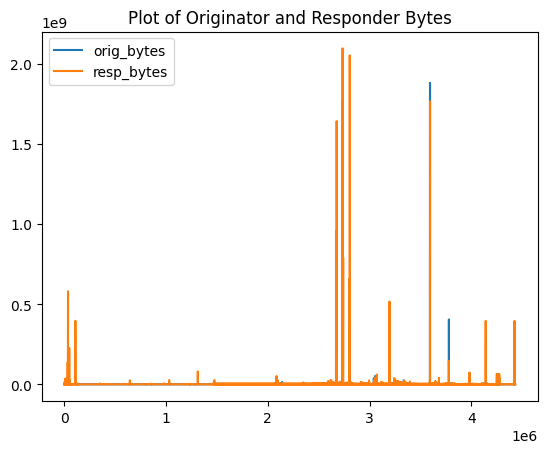

In [88]:
# Getting a plot of the orig_bytes and the resp_bytes
df_working_copy[['orig_bytes', 'resp_bytes']].plot(title='Plot of Originator and Responder Bytes')

<Axes: title={'center': 'Plot of Originator and Responder packets'}>

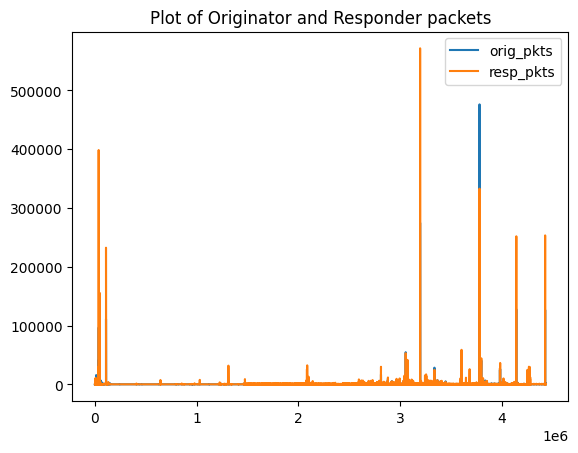

In [89]:
# Let's compare the orig_pkts vs resp_pkts
df_working_copy[['orig_pkts', 'resp_pkts']].plot(title='Plot of Originator and Responder packets')

<Axes: title={'center': 'Plot of Originator and Responder IP Bytes'}>

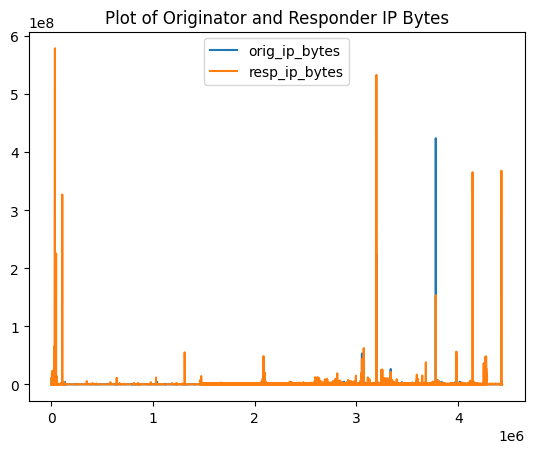

In [90]:
# Let's look at the orig_ip_bytes vs resp_ip_bytes
df_working_copy[['orig_ip_bytes', 'resp_ip_bytes']].plot(title='Plot of Originator and Responder IP Bytes')

<Axes: title={'center': 'Scatter Plot of Originator vs Responder Bytes'}, xlabel='orig_ip_bytes', ylabel='resp_ip_bytes'>

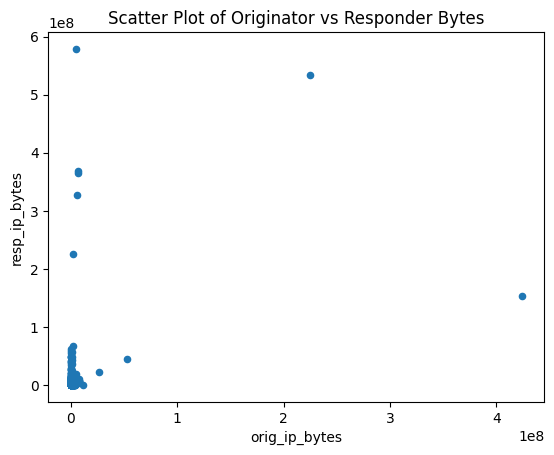

In [91]:
# Let's try the scatter plot instead

# Let's look at a scatter plot of the orig_ip_bytes vs resp_ip_bytes
# We can see clearly from this cluster, there are points here that are not grouped together
df_working_copy.plot.scatter(x='orig_ip_bytes', y='resp_ip_bytes', \
                             title='Scatter Plot of Originator vs Responder Bytes')


Let's create subplots. This is something that more time is spent on in the Matplotlib notebook <br>
&emsp; &emsp; 05 - Beginning Matplotlib <br>

This gives us a quick view of the various features  <br>
Clearly, we see some spikes below  <br>
These areas with spikes, would definitely be areas we should investigate  <br>
Obviously, we should make the graphs more readable  <br>
However, we are using Pandas plotting capabilities for a quick view  <br>

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

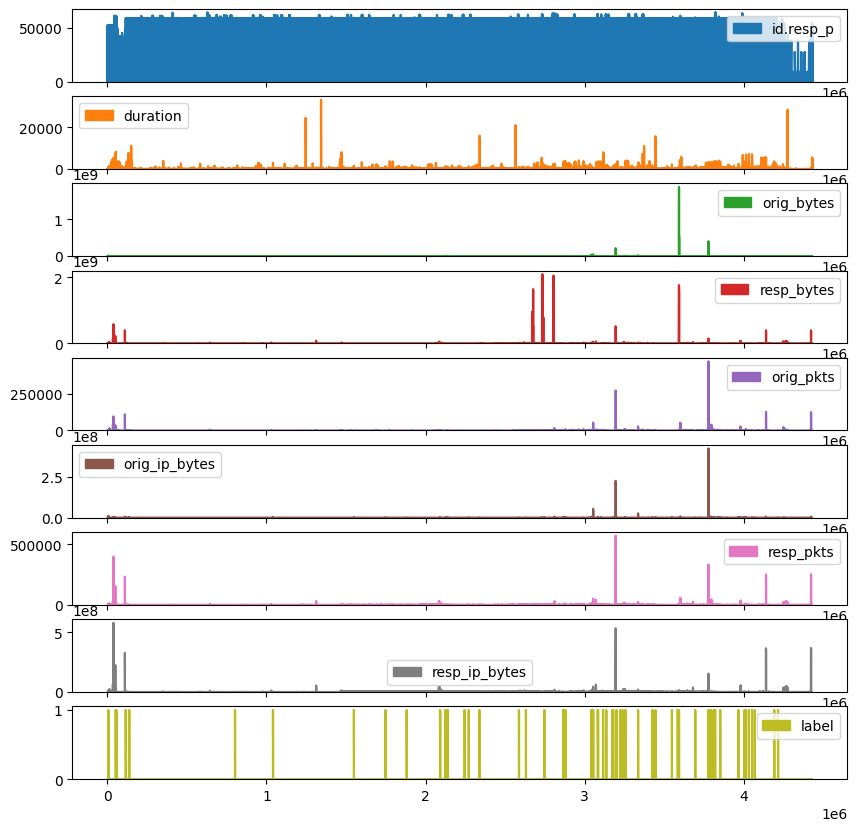

In [92]:
# Create a subplots
df_working_copy.plot.area(figsize=(10,10), subplots=True)

<Axes: >

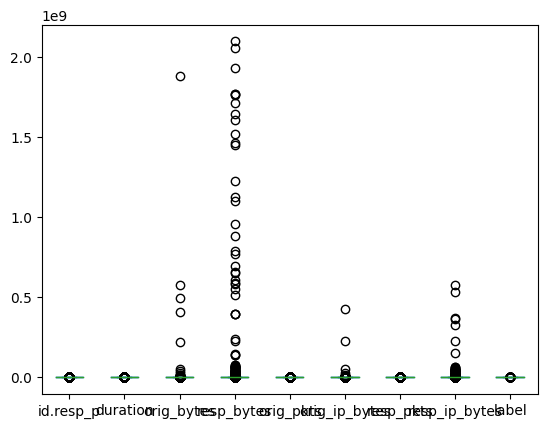

In [93]:
# Looking at the box plot, we are able to see some anomalies also
df_working_copy.plot.box()

<Axes: title={'center': 'Line Plot of Features'}>

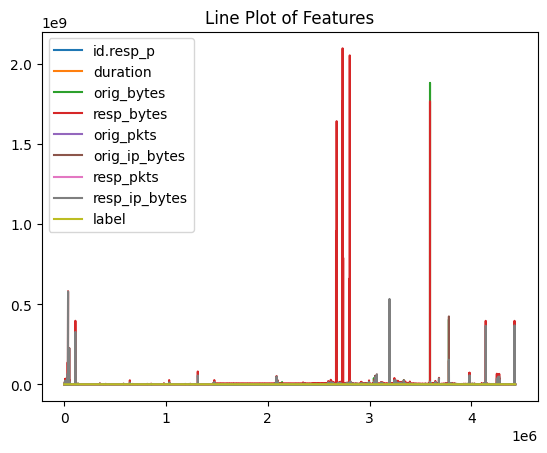

In [94]:
# Create a line plot of the features
df_working_copy.plot.line(title='Line Plot of Features')

<Axes: title={'center': 'Histogram Plot of Packets'}, ylabel='Packets'>

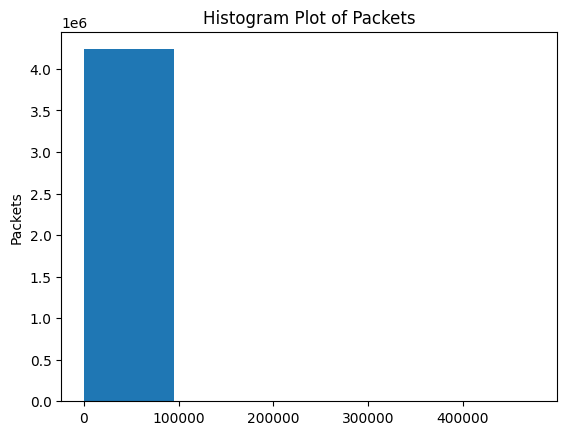

In [95]:
# Get a histogram of the packets
df_working_copy['orig_pkts'].plot(kind='hist', bins=5,  title='Histogram Plot of Packets', ylabel='Packets')

There is obviously a lot more we can do with this dataset. <br>
For now, let's move on from Pandas. <br>


Additional References and good reads/videos: <br>
http://pandas.pydata.org/pandas-docs/stable/reference/ <br>
https://datatofish.com/convert-string-to-float-dataframe/ <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html <br>
https://datagy.io/pandas-conditional-column/ <br>
https://www.statology.org/pandas-loc-multiple-conditions/ <br>
https://www.includehelp.com/python/conditional-selection-in-the-dataframe-pandas-dataframe.aspx <br> <br>

https://en.wikipedia.org/wiki/Correlation <br>
https://www.wallstreetmojo.com/correlation-matrix/ <br>
https://www.statology.org/how-to-read-a-correlation-matrix/   <br>
https://datagy.io/python-correlation-matrix/ <br>
https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/ <br>
https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html <br>
https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas <br> <br>

https://careerfoundry.com/en/blog/data-analytics/covariance-vs-correlation/ <br>
https://medium.com/@raghavan99o/scatter-matrix-covariance-and-correlation-explained-14921741ca56 <br>
https://www.wallstreetmojo.com/correlation-vs-covariance/ <br>
https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22 <br>
https://matplotlib.org/stable/tutorials/colors/colormaps.html <br>
https://towardsdatascience.com/20-great-pandas-tricks-for-data-science-3a6daed71da0 <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.memory_usage.html <br> <br>

https://datagy.io/pandas-groupby/ <br>
https://realpython.com/pandas-groupby/ <br>
https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html <br>
https://www.dataquest.io/blog/plot-dataframe-pandas/ <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html <br>